# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

## CIE values

In [2]:
C_df = pd.read_csv('cie400-700.csv', header=None)

C_df.head()

,0,1,2
0,0.0191,0.0020,0.0860
1,0.0434,0.0045,0.1971
2,0.0847,0.0088,0.3894
3,0.1406,0.0145,0.6568
4,0.2045,0.0214,0.9725


## Munsell samples

In [3]:
# skip the first line
# use the first column as row index

S_df = pd.read_csv('munsell-samples.csv', header=None, skiprows=1, index_col=0) 

S_df.head(n=2)

,1,2,3,4,5,6,7,8,9,10,...,428,429,430,431,432,433,434,435,436,437
0,,,,,,,,,,,,,,,,,,,,,
7.5 Y 8 10,0.0835,0.0797,0.0815,0.0830,0.0814,0.0828,0.0858,0.0827,0.0825,0.0860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.5 Y 8 4,0.1215,0.1276,0.1246,0.1341,0.1412,0.1428,0.1486,0.1594,0.1633,0.1748,...,48.180084,50.890554,30.715583,76.189926,-6.008709,27.421994,0.204334,0.337938,6.58915,38.049081


## Conversion matrix

In [4]:
T = np.array([
    [3.24, -1.54, -0.5],
    [-0.97, 1.88, 0.04],
    [0.056, -0.2, 1.06]
])

## Convert to numpy arrays

In [5]:
C = C_df.to_numpy()
S = S_df.to_numpy()

print(f'Size of C = {C.shape}')
print(f'Size of S = {S.shape}')

Size of C = (61, 3)
Size of S = (10, 437)


In [6]:
# values beyond 700nm are useless

S = S[:, :301]

print(f'Size of truncated S = {S.shape}')

Size of truncated S = (10, 301)


In [7]:
# verification

np.array_equal(S_df.iloc[:, :301], S[:, :])

True

## Sampling

In [8]:
# sampling at intervals of 5nm

S_sampled = S[:, ::5]

print(f'Size of sampled matrix = {S_sampled.shape}')

Size of sampled matrix = (10, 61)


# XYZ to RGB

In [9]:
print(f'Size of T = {T.shape}')
print(f'Size of C = {C.shape}')
print(f'Size of S = {S_sampled.shape}')

Size of T = (3, 3)
Size of C = (61, 3)
Size of S = (10, 61)


## Matrix multiplication

In [10]:
# matrix multiplication
# matching dimensions for parallel output

RGB = np.dot(T, np.dot(C.T, S_sampled.T))
RGB = RGB.astype(np.uint8)

print(f'Size of RGB = {RGB.shape}') 

Size of RGB = (3, 10)


In [11]:
# converting RGB array to dataframe
# adding munsell values column
# making munsell values as row names

RGB_df = pd.DataFrame(RGB.T, columns=['R', 'G', 'B'])
RGB_df['munsell'] = S_df.index
RGB_df = RGB_df.set_index('munsell')

RGB_df.head()

,R,G,B
munsell,,,
7.5 Y 8 10,17,10,0
7.5 Y 8 4,16,9,5
7.5 Y 8 2,15,10,7
7.5 G 7 10,2,10,5
2.5 BG 6 8,0,7,5


## Save values

In [12]:
RGB_df.to_csv('xyztorgb.csv')

## Display colours

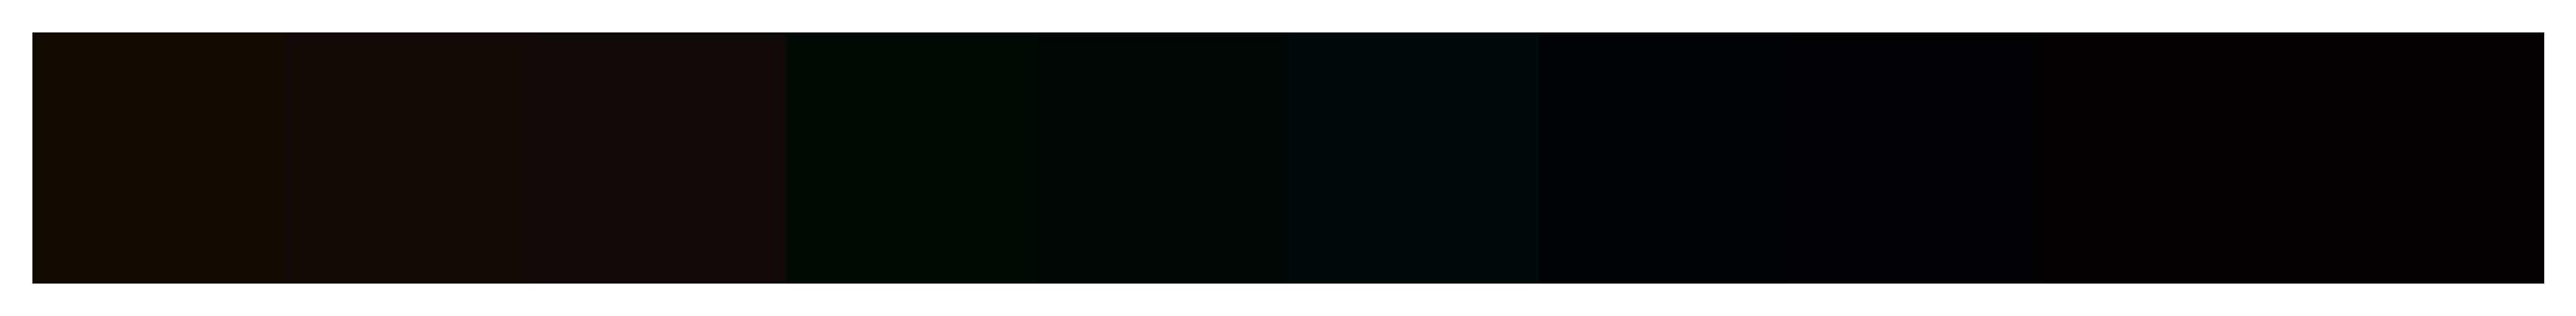

In [13]:
plt.figure(figsize=(10, 4), dpi=500)

flag = np.empty((1,10,3), dtype=np.uint8)
flag[0] = np.round(RGB.T, decimals=0)
plt.imshow(flag)
plt.axis('Off')
plt.show()

# Normalized spectral values

In [14]:
S_normalized = np.divide(S_sampled, np.sum(S_sampled, axis=1).reshape(-1, 1))

In [15]:
# matrix multiplication
# matching dimensions for parallel output

RGB_normalized = np.dot(T, np.dot(C.T, S_normalized.T))

# scaling to 255 and converting to integers
RGB_normalized *= 255
RGB_normalized = RGB_normalized.astype(np.uint8)

print(f'Size of normalized RGB = {RGB_normalized.shape}') 

Size of normalized RGB = (3, 10)


In [16]:
# converting RGB array to dataframe
# adding munsell values column
# making munsell values as row names

RGB_df_normalized = pd.DataFrame(RGB_normalized.T, columns=['R', 'G', 'B'])
RGB_df_normalized['munsell'] = S_df.index
RGB_df_normalized = RGB_df_normalized.set_index('munsell')

RGB_df_normalized.head()

,R,G,B
munsell,,,
7.5 Y 8 10,204,123,8
7.5 Y 8 4,173,97,53
7.5 Y 8 2,147,97,69
7.5 G 7 10,37,153,86
2.5 BG 6 8,18,145,103


## Save values

In [17]:
RGB_df_normalized.to_csv('xyztorgb_normalized.csv')

## Display colours

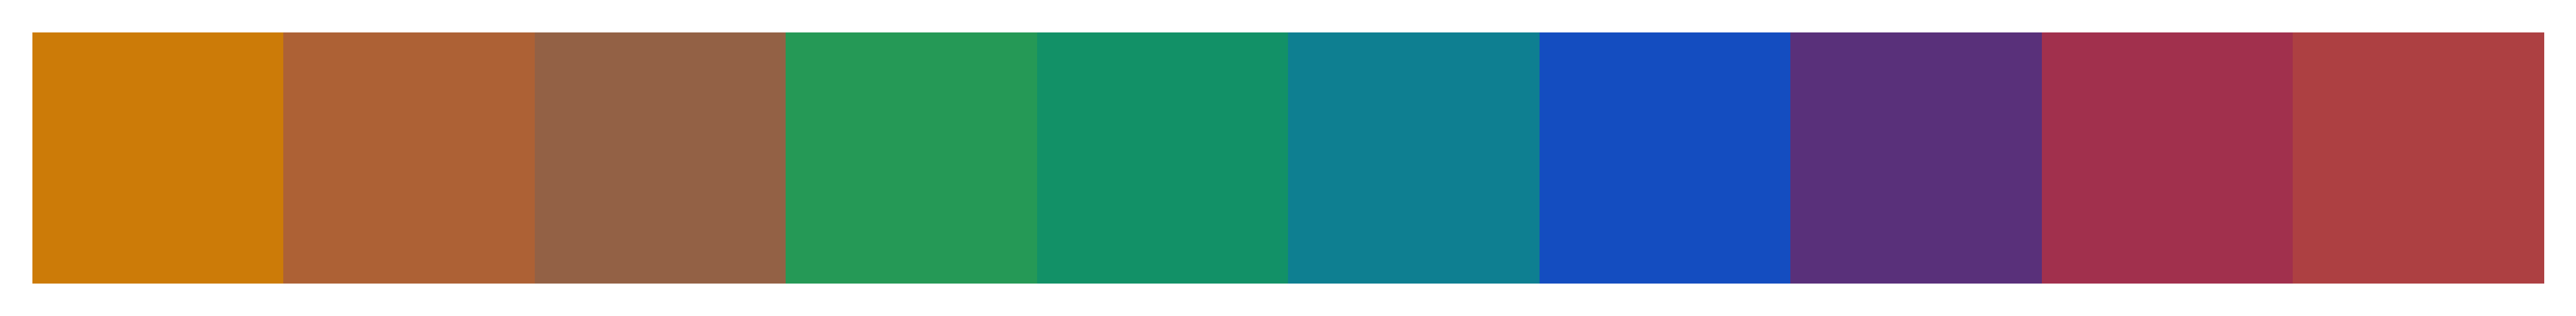

In [18]:
plt.figure(figsize=(10, 4), dpi=500)

flag = np.empty((1,10,3), dtype=np.uint8)
flag[0] = RGB_normalized.T 
plt.imshow(flag)
plt.axis('Off')
plt.show()

# SPDF

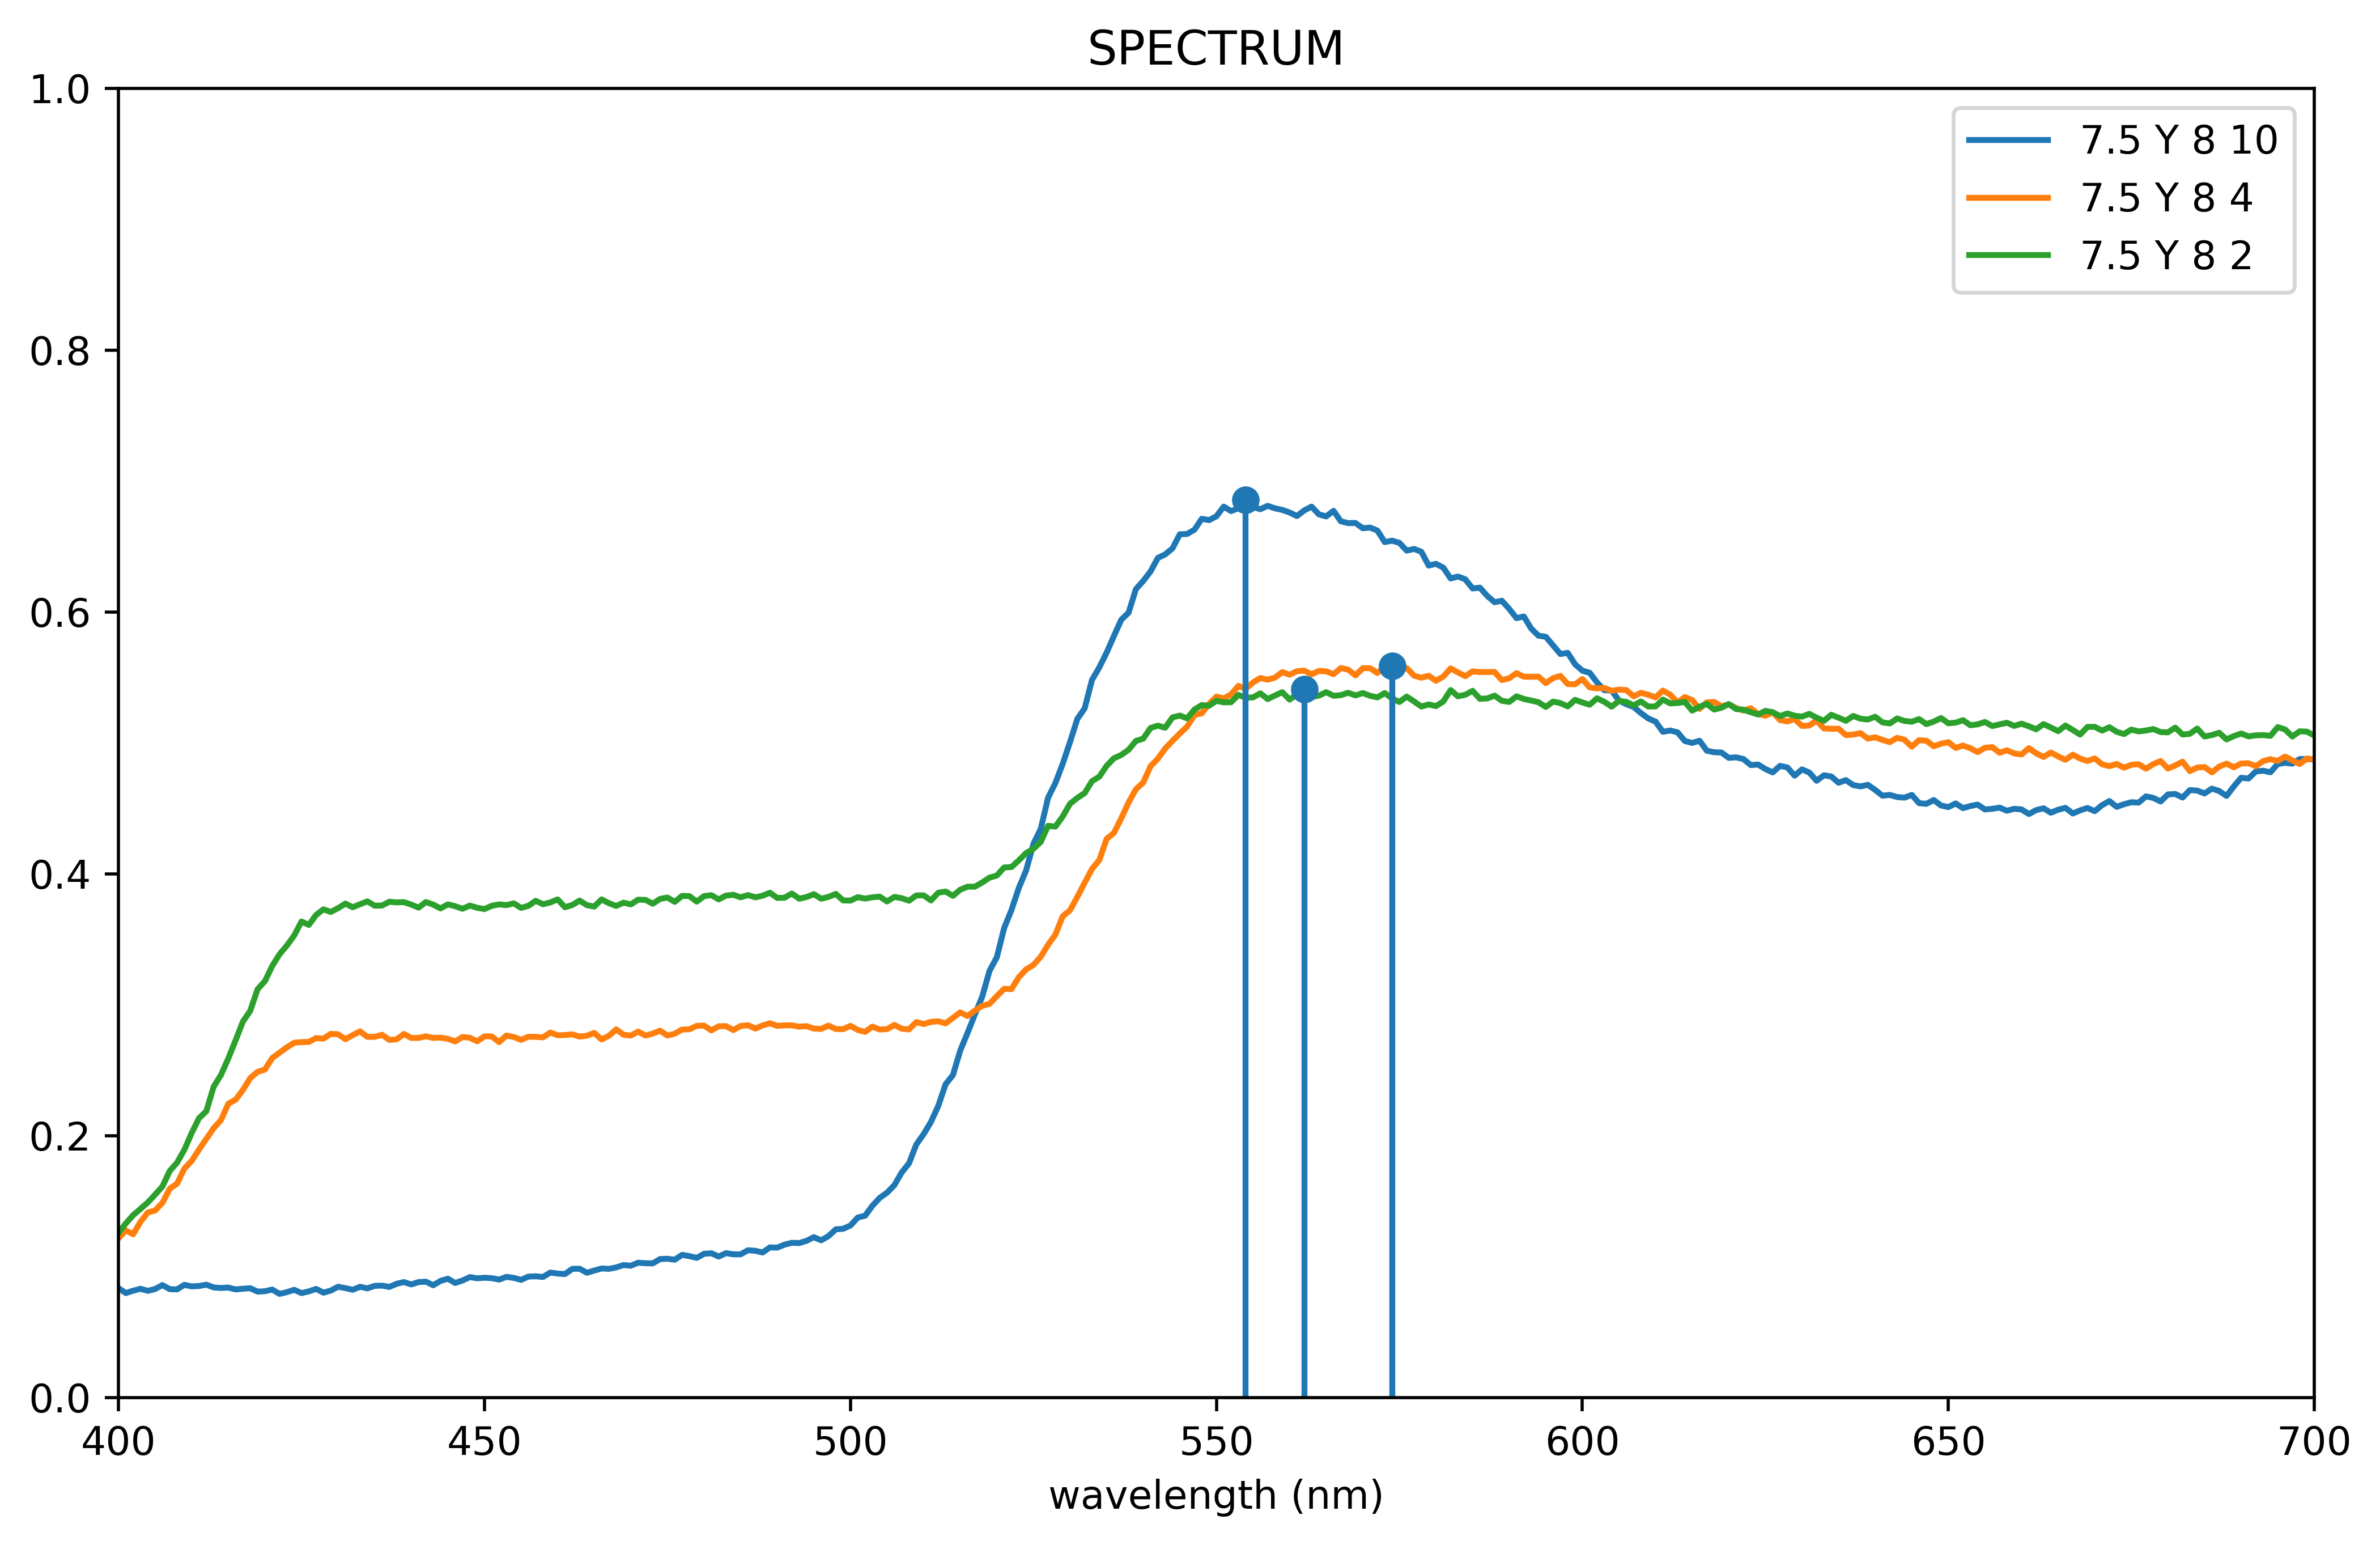

In [19]:
plt.style.use('default')

plt.figure(figsize=(10, 6), dpi=500)

plt.plot(range(400, 701), S[0, :301], label='7.5 Y 8 10')
plt.plot(range(400, 701), S[1, :301], label='7.5 Y 8 4')
plt.plot(range(400, 701), S[2, :301], label='7.5 Y 8 2')

plt.stem(np.argmax(S[0, :301]) + 400, max(S[0, :301]))
plt.stem(np.argmax(S[1, :301]) + 400, max(S[1, :301]))
plt.stem(np.argmax(S[2, :301]) + 400, max(S[2, :301]))

plt.xlim((400, 700))
plt.ylim((0, 1))
plt.title('SPECTRUM')
plt.xlabel('wavelength (nm)')

plt.legend()
plt.show()

In [20]:
def pprint(array, label):
    print(f'{label} for 7.5 Y 8 10 = {array[0]}')
    print(f'{label} for 7.5 Y 8 4  = {array[1]}')
    print(f'{label} for 7.5 Y 8 2  = {array[2]}')

## Hue

In [21]:
# hue is the highest amplitude

hue_1 = np.argmax(S[0, :301]) + 400
hue_2 = np.argmax(S[1, :301]) + 400
hue_3 = np.argmax(S[2, :301]) + 400

pprint([hue_1, hue_2, hue_3], 'Hue')

Hue for 7.5 Y 8 10 = 554
Hue for 7.5 Y 8 4  = 574
Hue for 7.5 Y 8 2  = 562


## Saturation

In [22]:
# saturation is the magnitude of the hue relative to other wavelengths

# max saturation = colour ~hue and no grey
# min saturation = colour is grey

sat_1 = hue_1 / sum(S[0, :301])
sat_2 = hue_2 / sum(S[1, :301])
sat_3 = hue_3 / sum(S[2, :301])

pprint([sat_1, sat_2, sat_3], 'Saturation')

Saturation for 7.5 Y 8 10 = 5.040033697265006
Saturation for 7.5 Y 8 4  = 4.686640136255488
Saturation for 7.5 Y 8 2  = 4.167250600803344


## Intensity

In [23]:
# intensity is the area under the curve

# type 1

int_1 = sum(S[0, :381])
int_2 = sum(S[1, :381])
int_3 = sum(S[2, :381])

pprint([int_1, int_2, int_3], 'Intensity (sum)')

print()

# type 2

int_4 = np.trapz(S[0, :301], dx=1)
int_5 = np.trapz(S[1, :301], dx=1)
int_6 = np.trapz(S[2, :301], dx=1)

pprint([int_4, int_5, int_6], 'Intensity (integral)')

Intensity (sum) for 7.5 Y 8 10 = 109.91990000000006
Intensity (sum) for 7.5 Y 8 4  = 122.47580000000002
Intensity (sum) for 7.5 Y 8 2  = 134.86110000000002

Intensity (integral) for 7.5 Y 8 10 = 109.63454999999999
Intensity (integral) for 7.5 Y 8 4  = 122.17155
Intensity (integral) for 7.5 Y 8 2  = 134.5455


## Saturation (alternate)

In [24]:
sat_1 = 1 - abs(np.argmax(hue_1) - (np.abs(S[0, :301] - hue_1/2)).argmin()) / 300
sat_2 = 1 - abs(np.argmax(hue_2) - (np.abs(S[1, :301] - hue_2/2)).argmin()) / 300
sat_3 = 1 - abs(np.argmax(hue_3) - (np.abs(S[2, :301] - hue_3/2)).argmin()) / 300

pprint([sat_1, sat_2, sat_3], 'Saturation')

Saturation for 7.5 Y 8 10 = 0.4866666666666667
Saturation for 7.5 Y 8 4  = 0.42000000000000004
Saturation for 7.5 Y 8 2  = 0.45999999999999996


# Approximating 7.5 Y 8 8 

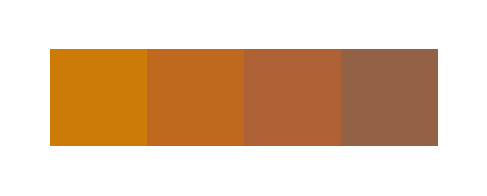

In [25]:
plt.figure(figsize=(1, 1), dpi=500)

flag = np.empty((1,4,3), dtype=np.uint8)
flag[0] = np.array([
    [204, 123, 8],
    [190, 105, 30],
    [173, 97, 53],
    [147, 97, 69]
])
plt.imshow(flag)
plt.axis('Off')
plt.show()